<a href="https://colab.research.google.com/github/rippedtuco/Musconet/blob/main/marching_Feature_Comparison_Rf_Bf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1795/1795 [==============================] - 2s 1ms/step


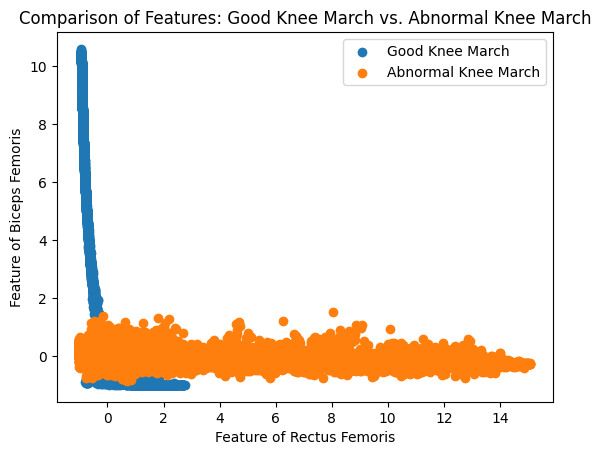

In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt

drive.mount('/content/drive')
Normal_directory = "/content/drive/MyDrive/EMG/CSV_N"
Abnormal_directory = "/content/drive/MyDrive/EMG/CSV_A"

def load_patient_data(main_directory):

    # Get the list of patient folders
    patient_folders = [folder for folder in os.listdir(main_directory)]

    march_data = []  # Initialize empty data frame for march data
    leg_extension_data = []  # Initialize empty data frame for leg extension data
    knee_flexion_data = []  # Initialize empty data frame for knee flexion data

    for patient_folder in patient_folders:
        patient_path = os.path.join(main_directory, patient_folder)  # Path to the patient folder

        march_files = [file for file in os.listdir(patient_path) if file.__contains__("mar")]
        march_patient_data = pd.concat([pd.read_csv(os.path.join(patient_path, file)) for file in march_files]) # Load CSV data for the patient
        march_data.append(march_patient_data)  # Append patient data to march data frame

        leg_extension_files = [file for file in os.listdir(patient_path) if file.__contains__("pie")]
        leg_extension_patient_data = pd.concat([pd.read_csv(os.path.join(patient_path, file)) for file in leg_extension_files]) # Load CSV data for the patient
        leg_extension_data.append(leg_extension_patient_data)  # Append patient data to leg extension data frame

        knee_flexion_files = [file for file in os.listdir(patient_path) if file.__contains__("sen")]
        knee_flexion_patient_data = pd.concat([pd.read_csv(os.path.join(patient_path, file)) for file in knee_flexion_files]) # Load CSV data for the patient
        knee_flexion_data.append(knee_flexion_patient_data)  # Append patient data to knee flexion data frame

    march_data = pd.concat(march_data)  # Concatenate all march data frames
    leg_extension_data = pd.concat(leg_extension_data)  # Concatenate all leg extension data frames
    knee_flexion_data = pd.concat(knee_flexion_data)  # Concatenate all knee flexion data frames

    
    return march_data,leg_extension_data,knee_flexion_data

g_march_data,g_leg_extension_data,g_knee_flexion_data = load_patient_data(os.path.join(Normal_directory))
b_march_data,b_leg_extension_data,b_knee_flexion_data = load_patient_data(os.path.join(Abnormal_directory))

column_index = 4
if column_index < len(b_march_data.columns):
    b_march_data = b_march_data.drop(b_march_data.columns[column_index], axis=1)

if column_index < len(b_leg_extension_data.columns):
    b_leg_extension_data = b_leg_extension_data.drop(b_leg_extension_data.columns[column_index], axis=1)

if column_index < len(b_knee_flexion_data.columns):
    b_knee_flexion_data = b_knee_flexion_data.drop(b_knee_flexion_data.columns[column_index], axis=1)

if column_index < len(g_march_data.columns):
    g_march_data = g_march_data.drop(g_march_data.columns[column_index], axis=1)

if column_index < len(g_leg_extension_data.columns):
    g_leg_extension_data = g_leg_extension_data.drop(g_leg_extension_data.columns[column_index], axis=1)

if column_index < len(g_knee_flexion_data.columns):
    g_knee_flexion_data = g_knee_flexion_data.drop(g_knee_flexion_data.columns[column_index], axis=1)

g_march_data_train,g_march_data_test=train_test_split(g_march_data,test_size=0.2)
g_leg_extension_data_train,g_leg_extension_data_test=train_test_split(g_leg_extension_data,test_size=0.2)
g_knee_flexion_data_train,g_knee_flexion_data_test=train_test_split(g_knee_flexion_data,test_size=0.2)

b_march_data_train,b_march_data_test=train_test_split(b_march_data,test_size=0.2)
b_leg_extension_data_train,b_leg_extension_data_test=train_test_split(b_leg_extension_data,test_size=0.2)
b_knee_flexion_data_train,b_knee_flexion_data_test=train_test_split(b_knee_flexion_data,test_size=0.2)

model_normal_knee_march = load_model("/content/drive/MyDrive/Models/encoder_model_march.h5")
model_normal_knee_extension = load_model("/content/drive/MyDrive/Models/encoder_model_Leg_Extension.h5")
model_normal_knee_flexion = load_model("/content/drive/MyDrive/Models/encoder_model_Knee_flexion.h5")

model_abnormal_knee_march = load_model("/content/drive/MyDrive/Models/encoder_model_bad_march.h5")
model_abnormal_knee_extension = load_model("/content/drive/MyDrive/Models/encoder_model_bad_leg_extension.h5")
model_abnormal_knee_flexion = load_model("/content/drive/MyDrive/Models/encoder_model_bad_knee_flexion.h5")

# Extract features from the encoder part of the models
encoder_model = Model(inputs=model_normal_knee_march.input, outputs=model_normal_knee_march.layers[1].output)
features_normal_knee_march = encoder_model.predict(g_march_data_test)

encoder_model_2 = Model(inputs=model_normal_knee_extension.input, outputs=model_normal_knee_extension.layers[1].output)
features_normal_knee_extension = encoder_model_2.predict(g_leg_extension_data_test)

encoder_model_3 = Model(inputs=model_normal_knee_flexion.input, outputs=model_normal_knee_flexion.layers[1].output)
features_normal_knee_flexion = encoder_model_3.predict(g_knee_flexion_data_test)

encoder_model_4 = Model(inputs=model_abnormal_knee_march.input, outputs=model_abnormal_knee_march.layers[1].output)
features_abnormal_knee_march = encoder_model_4.predict(b_march_data_test)

encoder_model_5 = Model(inputs=model_abnormal_knee_extension.input, outputs=model_abnormal_knee_extension.layers[1].output)
features_abnormal_knee_extension = encoder_model_5.predict(b_leg_extension_data_test)

encoder_model_6 = Model(inputs=model_abnormal_knee_flexion.input, outputs=model_abnormal_knee_flexion.layers[1].output)
features_abnormal_knee_flexion = encoder_model_6.predict(b_knee_flexion_data_test)

plt.scatter(features_normal_knee_march[:, 0], features_normal_knee_march[:, 1],label='Good Knee March')
plt.scatter(features_abnormal_knee_march[:, 0], features_abnormal_knee_march[:, 1],label='Abnormal Knee March')
plt.xlabel('Feature of Rectus Femoris')
plt.ylabel('Feature of Biceps Femoris')
plt.title('Comparison of Features: Good Knee March vs. Abnormal Knee March')
plt.legend()
plt.show()